# Chapter 5 : Dynamical Forecasting Methods (Simplex and SMap Projections)

In the previous section, we examined various techniques for characterizing time-series data as well as additional statistical operations that can be used to make predictions. Many of these techniques include finding the models that would most accurately describe the time series and extracting the ideal parameters that would do so with the least amount of error. However, many processes in the actual world have nonlinear, intricate, and dynamic properties, making other approaches that can take these into account necessary. 


The approaches that use empirical models rather than intricate, parameterized, and postulated equations will be introduced and discussed in this section. We will attempt to rebuild the underlying mechanisms that may be too complex, noisy, or dynamic to be represented by equations using raw time series data. This technique suggests a more adaptable alternative for dealing with and making predictions about dynamic systems.

This Notebook will discuss the following:
- Introduction to Empirical Dynamic Modelling
- Visualization of EDM Prediction with Chaotic Time Series
- Lorenz Attractor
- Taken's Theorem / State-Space Reconstruction (SSR)
- Simplex Projection
- Determination of Optimal Embedding Values (Hyperparameter Tuning)
- Differentiation Noisy Signals from Chaotic Signals
- S-Map Projection (Sequentially Locally Weighted Global Linear Map)

Prepared by: Michael Bautista Baylon


## Empirical Dynamic Modelling

Since natural systems are frequently dynamic and complicated (i.e., nonlinear), linear statistical techniques have difficulty explaining them. Since linear techniques are fundamentally predicated on "correlation," which might occur without causation or without correlation at all, they are inadequate for the study of dynamical systems.

Many scientific fields use models as approximations of reality in order to test hypothesized mechanisms, explain past observations and predict future outcomes. 

* based on hypothesized parametric equations or established physical principles that describe straightforward idealized scenarios, such as controlled single-factor tests, but do not hold true in more complicated natural circumstances
* An alternate and very flexible method is to use empirical models, which derive patterns and relationships from the data (rather than utilizing postulated equations).

An new non-parametric, data-driven paradigm for modeling nonlinear systems is called empirical dynamic modeling (EDM). The mathematical theory of reconstructing manifolds from time-series serves as the foundation for EDM (Takens, 1981). The Simplex Projection (Sugihara and May, 1990) and the S-Map Projection are the EDM techniques that will be explored today (Sugihara, 1994).


EDM's fundamental objective is to use time-series data to "reconstruct the behavior of dynamic systems." These techniques are especially well suited for researching systems that exhibit non-equilibrium dynamic and nonlinear state-dependent behavior since they work with few assumptions (i.e., where interactions change over time and as a function of the system state, chaotic or near chaotic systems)




### Visualization of EDM Prediction with a  Chaotic Time Series

The next sets of graphics show how empirical dynamic modeling, given a chaotic time series, attempts to forecast future values utilizing the entire dataset rather than formulating a parametrized equation. Consider the following. [walkthrough](http://opetchey.github.io/RREEBES/Sugihara_and_May_1990_Nature/Simplex_projection_walkthrough.html). [Petchey, O. 2020]

Let's attempt to forecast the potential value or location of the pink dot—the following dot in the time series—in 

<img src="pic1.jpg.png" style="width:800px">

Since there are no previous domain knowledge models or parametrized equations in this empirical analysis of the data, we will examine the prior dynamics that existed right before the pink dot (the few data points highlighted by the red lines)

<img src="pic2.jpg.png" style="width:800px">

We will examine the "past library" of dynamics utilizing the entire dataset in light of the dynamics' brief history and select those that 

<img src="pic3.jpg.png" style="width:800px">

The next point in the sequence of the chosen earlier dynamics with a similar pattern or trajectory (blue lines) will be at the succeeding point (highlighted by the green dots)

<img src="pic4.jpg.png" style="width:800px">

The algorithm may then deduce where the next value in the entire series (the pink dot) might be by using the useful information produced by the green dots. Projecting the values or the positions of the green dots toward the beginning of the series is one approach to achieve this. Pink indicates the precise location, and green indicates the average location of previous readings.

<img src="pic5.jpg.png" style="width:800px">

The red line would represent the most recent movement of the dynamics, and the blue lines would correspond to the ones that are most similar and can provide useful information for the prediction using a time-shifted representation of the system using the lagged values corresponding to the number of points used as history.

<img src="pic6.jpg.png" style="width:800px">

### Lorenz Attractor
Let's define a specific chaotic system that will be used as an example in the following areas.

A group of chaotic Lorenz System solutions make up the Lorenz Attractor.
The Lorenz system is known to have chaotic solutions for particular parameter values and initial conditions. The butterfly effect The term "Butterfly Effect" refers to the Lorenz system's aesthetic appearance, which at certain angles resembles butterfly wings, as well as the system's property of having potentially enormous divergent values even with very small perturbations ("the flaps of a butterfly caused a tornado in the other side of the planet").

A coupled dynamic system with three differential equations makes up the system (think of the axes as variables in a dynamic system).
It might be a dynamic system of resources, prey, and predators in an ecological example.

\begin{align} \frac{dX}{dt} = \alpha Y - \alpha X   \end{align}
\begin{align} \frac{dY}{dt} = -XZ + \rho X - Y  \end{align}
\begin{align} \frac{dZ}{dt} =  XY - \beta Z \end{align}


C:\Users\Michael Baylon\AppData\Local\Temp\ipykernel_1160\3558775256.py:40: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig1.gca(projection='3d')


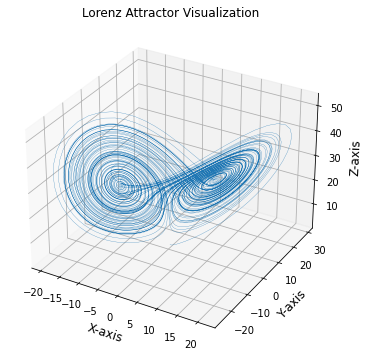

In [22]:
# Visualize Lorenz Attractor [Piziniacco. L, 2020]

import numpy as np
import matplotlib.pyplot as plt

beta = 2.66667
rho = 28.0
sigma = 10.0


def lorenz(x, y, z, beta, rho, sigma):
    Xdt = (sigma*y) - (sigma*x)
    Ydt = -(x*z) + (rho*x) - y
    Zdt = (x*y) - (beta*z)
    return Xdt, Ydt, Zdt


dT = 0.01
iteration = 10000

x_out = np.zeros(iteration)
y_out = np.zeros(iteration)
z_out = np.zeros(iteration)   

# starting point
x_out[0] = 0
y_out[0] = 1
z_out[0] = 1.05


for i in range(iteration - 1):
    curr_x, curr_y, curr_z = lorenz(x_out[i], y_out[i], z_out[i], beta, rho, sigma)
    x_out[i+1] = x_out[i] + (curr_x*dT) 
    y_out[i+1] = y_out[i] + (curr_y*dT) 
    z_out[i+1] = z_out[i] + (curr_z*dT) 
    
# Plot
fontdict={'size':12,}
fig1 = plt.figure(figsize=(6,6))
ax = fig1.gca(projection='3d')
ax.plot(x_out, y_out, z_out, lw=0.25)

ax.set_xlabel("X-axis", fontdict)
ax.set_ylabel("Y-axis", fontdict)
ax.set_zlabel("Z-axis", fontdict)
ax.set_title("Lorenz Attractor Visualization", fontdict)

plt.show()


The dynamic system (Lorenz) was drawn using each point (or system state) calculated from the differential equations, as can be seen in the image above. From this point on, system states can be described as points in a high-dimensional system.

On the other hand, by projecting the dynamic system onto the axes, we may also extract the individual parts or states of the system from a graph of a dynamic system. In a dynamic system, the axes can be regarded of as the primary state variables. These factors might be population abundances, resource availability, or environmental conditions in an ecosystem, for instance.

Although time-series can represent independent state variables, in general, each time series is an observation function of the system state that can convolve multiple state variables. As an example, by projecting the 3D plot into just the Z-axis (which would just be similar to the **z out** component in the code), we can "extract" the values of the time series in one of the states (the Z-component for example) in the Lorenz Attractor above.

<img src="figures/projection1.jpg" style="width:600px">

By projecting the complex graph into its constituent axes, we can easily apply the same idea to other state variable

<img src="figures/projection3.jpg" style="width:800px">

##  Takens' Theorem / State-Space Reconstruction (SSR)

- Reconstructing the system dynamics from the available time-series data is the aim of EDM (the behavior of the dynamic system is encoded in the temporal ordering of the time series)
- The attractor can be recreated using time-lags from a single time series, according to the theorem (substituting those time lags for unknown and unobserved variables)


Instead of describing the system state using all available state variables (as is frequently the case), we recreate the state-space using an E-dimensional lagged-coordinate embedding (embedding = number of higher dimensions).

$$ \mathbf{X_t} = (\mathbf{x_t}, \mathbf{x_{t-\tau}},\mathbf{x_{t-2\tau}}..., \mathbf{x_{t-(E-1)\tau}}) $$


The reconstruction maintains the primary mathematical characteristics of the original system if enough lags are utilized.
- Nearby points in the reconstruction will correspond to similar system states in the original state, and rebuilt states will map one-to-one to the actual system states.

The key characteristics of the genuine dynamics are preserved in the shadow version of the dynamics created by such an embedding, according to Takens' theorem (also known as "topological invariance").
To put it another way, if enough lags are used, this type of reconstruction is fundamentally a diffeomorphism and maintains the original system's fundamental mathematical features.
In other words, the reconstruction map compares local neighborhoods (and their trajectories) to local neighborhoods (and their trajectories) of the original system. [6] The following illustrates this:


We'll attempt to reconstruct a manifold in the following code by using the time-lagged values of the X-axis from the Lorenz Attractor:

C:\Users\Michael Baylon\AppData\Local\Temp\ipykernel_1160\4137704369.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig2.gca(projection='3d')


Text(0.5, 0.92, 'Attractor Reconstruction from lagged X-values')

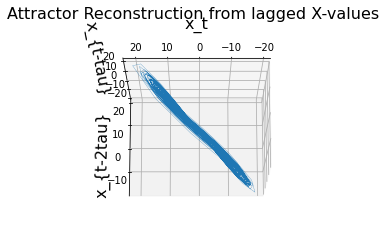

In [23]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

# lagged values of X from the Lorenz Attractor
xt   = x_out[:-2:5]
xt_1 = x_out[1:-1:5]
xt_2 = x_out[2::5]

# Plot
fontdict={'size':16,}
fig2 = plt.figure(figsize=(6,4))
ax = fig2.gca(projection='3d')
ax.plot(xt, xt_1, xt_2, lw=0.25)

ax.view_init(-15, 90)
ax.set_xlabel("x_t", fontdict)
ax.set_ylabel("x_{t-tau}", fontdict)
ax.set_zlabel("x_{t-2tau}", fontdict)
ax.set_title("Attractor Reconstruction from lagged X-values", fontdict)




The Lorenz Attractor on X's "shadow manifold" is the reconstruction shown above. Alternatively, we might refer to the reconstruction of time-lagged data X as Mx if we refer to the Lorenz Attractor as M. The manifold up top displays the state-variable X's historical dynamics. According to Taken's Theorem, Mx retains several significant traits of M.
* the topology of M
* the Lyanpunov exponents

Additionally, the shadow manifold and the original manifold are 1:1 mapped. By just using a lagged-time series of one of the axes/state variables, they allow us to recover some of the characteristics of the original manifold.

<img src="takens reconstruction.png" style="width:300px">

##  Simplex Projection


- The fundamental principle of simplex forecasting is that future values can be predicted from the behavior of like historical values, even for chaotic time series (not possible with random noise)
- If enough lags are utilized, the reconstruction will map one-to-one to the original manifold (the reconstructions has sufficiently large embedding)

NOTE: It's not necessary for the number of embedding or dimensions to match the number of dimensions in the original dynamical system.

Upper bound = $E < 2D + 1 $ (Whitney, 1936)


- Poor forecasting ability because system behavior cannot be accurately predicted if the dimension is too tiny because reconstructed states can overlap and appear the same even though they are in distinct locations in the actual state-space.
- To determine the ideal number of embedding dimensions with forecasting success as the indication, we can loop over all feasible numbers of embedding dimensions.

### Determining the Complexity of the Systems / Optimal Embedding Value (Hyperparameter Tuning)

A time series is often split in half when utilizing Simplex projection, with one half (X) serving as the library set for out-of-sample analysis.
prediction of the second half of the reservation, the set prediction (Y). The prediction is made out of sample since the prediction set is not used in the model's creation.

A nonparametric state space analysis is simplex projection. An individual's prediction

$$ \mathbf{Y}(\mathbf{t_k}) = \{ Y(\mathbf{t_k}), Y(\mathbf{t_k}-1), …, Y(\mathbf{t_k}-E + 1) \} $$

is given by the projections of its neighbors in the state space in the library
set, 

$$ \{ (\mathbf{X_1}), \mathbf{X_2}, …, \mathbf{X_\mathbf{(E+1)}} \} $$

where 

$$||\mathbf{X_\mathbf{(1)}} -  \mathbf{Y\mathbf{(t_k)}}|| = min(||X - Y(\mathbf{t_k})||) $$for all$$ X \neq Y $$


, $ \mathbf{X(2)} $ is the second nearest neighbor, and so on. [6]

All $E + 1$ neighboring points from the library set form a minimal polygon (i.e., simplex) enclosing the predictee under embedding dimension E. The one-step forward prediction $ \hat{Y} (\mathbf{t_k} + 1)$ can then be determined by averaging the one-step forward projections of the neighbors

$$ {\mathbf{X_\mathbf{(1)}}(\mathbf{t_1} + 1), {\mathbf{X_\mathbf{(2)}}}(\mathbf{t_2} + 1), …, {\mathbf{X_\mathbf{(E+1)}}}(\mathbf{t_\mathbf{(E+1)}} + 1)} $$ 

By carrying out simplex projection using different values of E, the optimal embedding dimension E can be determined according to the predictive skill. 

There are several ways to evaluate the predictive skill of simplex projection,
such as: 

*   correlation coefficient (q)
*   mean absolute error (MAE) between the observation
*   forecast results (i.e., comparing $Y(\mathbf{t_k} + 1)$ with $\hat{Y}(\mathbf{t_k} +1)) $

<img src="simplex.jpg" style="width:300px">

### Example 1: Prediction with the Simplex Algorithm (Chaotic Map Data)

In [1]:
# Install pyEDM
!pip install pyEDM

In [3]:
# Import libraries
import numpy as np
from numpy.random import default_rng
import pandas as pd
from pandas.plotting import autocorrelation_plot
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from pyEDM import *
%matplotlib inline
rng = default_rng()

###  Chaotic TentMap Data Generation
TentMap generated from the following function:

\begin{equation}
        \mathbf{x_\mathbf{(t+1)}}=
        \begin{cases}
            2\mathbf{x_t} & 0.5 > \mathbf{x_t} > 0  \\
            2-2\mathbf{x_t} & 1 > \mathbf{x_t} > 0.5
        \end{cases}
    \end{equation}

First difference was taken: $\mathbf{\triangle_t} = \mathbf{x_\mathbf{(t+1)}}- \mathbf{x_t} $

Sample visualization of a tentmap is shown below: [11]

<img src="tentmap.jpg" style="width:350px">

In [4]:
# generate TentMap timeseries

def gen_TentMap(n=1000):  
    tentmap = np.zeros(n)
    tentmap[0] = rng.random()
    r = 1.999

    for i in range(n-1):
        if tentmap[i] < 0.5:
            tentmap[i+1] = r * tentmap[i]
        else:
            tentmap[i+1] = r *(1 - tentmap[i])
    
    return tentmap
        
tentmap = gen_TentMap()
tentmap = np.diff(tentmap)
time_index = np.arange(len(tentmap))
tentmap_list  = list(zip(time_index, tentmap))

tentmap_df = pd.DataFrame(tentmap_list, columns=["Time", "TentMap"])
tentmap_df.head()

,Time,TentMap
0,0,-0.804250
1,1,0.130348
2,2,0.260565
3,3,0.435346
4,4,-0.870258


Text(0, 0.5, '$\\mathbf{\\Delta_t}}$')

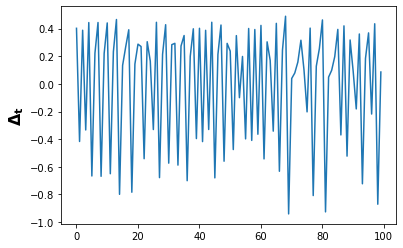

In [70]:
# plot the first 100 values to visualize the timeseries

pd.Series(tentmap_df["TentMap"][0:100]).plot()
plt.ylabel('$\mathbf{\Delta_t}}$', size=16)

In [71]:
# check for stationarity of the first-difference TentMap time-series

from statsmodels.tsa.stattools import adfuller

result = adfuller(tentmap_df["TentMap"])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.324747
p-value: 0.000000
Critical Values:
	1%: -3.437
	5%: -2.864
	10%: -2.568


In [72]:
# Compute for correlation coefficient for increasing Tp (timestep window)
corr_coeff_tentmap = []
for Tp in np.arange(1,11):
    simplex_out = Simplex( dataFrame = tentmap_df, lib = "1 400", pred = "450 800",  E = 3, Tp=Tp, embedded = False, showPlot = False, columns="TentMap", target="TentMap")
    metrics = pyEDM.ComputeError(simplex_out.Observations, simplex_out.Predictions)
    corr_coeff_tentmap.append(metrics['rho'])

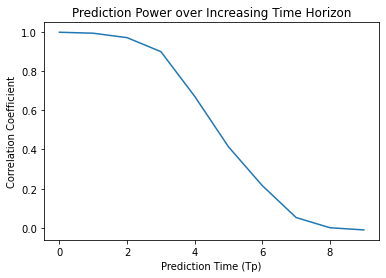

In [73]:
# corr_coeff_tentmap = [1.0, 1.0, 0.98, .88, 0.61, 0.35, 0.19, 0.08, 0.06, 0.02]
pd.Series(corr_coeff_tentmap).plot()
plt.ylabel('Correlation Coefficient')
plt.xlabel('Prediction Time (Tp)')
plt.title('Prediction Power over Increasing Time Horizon')
plt.show()

**Discussion**

As we extend the prediction time, we can see from the plot above that the correlation coefficient declines. Since the predicting ability decreases the farther the prediction horizon, this is a trait of a chaotic sequence. The "butterfly effect," which causes neighboring trajectories to gradually diverge over time when there is a tiny change in the beginning conditions, is an important characteristic of many natural systems.

Long-term forecasting is hampered by the dilution of the predictive state over time. We can observe how the prediction skill decreases when the prediction time horizon is extended in the plot below.

In the graphs below, we compare the accuracy between the predictions given Tp = 2 (2 timesteps in to the future) as compared to Tp = 5 (5 timesteps into the future), given the same Embedding E=3 and $\tau$ = 1

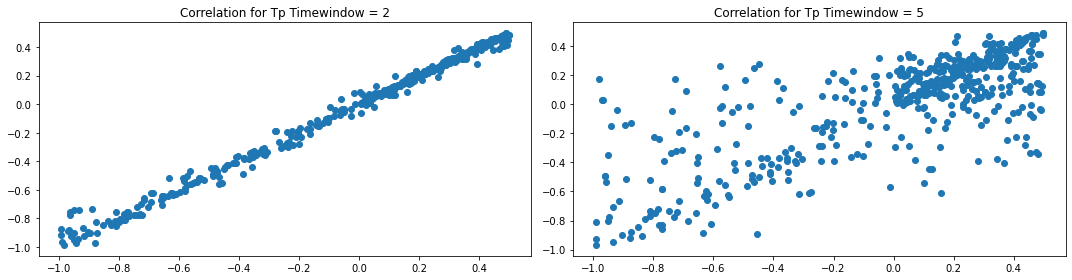

In [5]:
simplex_out_2 = Simplex( dataFrame = tentmap_df, lib = "1 500", pred = "501 999",  E = 3, Tp=2, embedded = False, showPlot = False, columns="TentMap", target="TentMap")
simplex_out_5 = Simplex( dataFrame = tentmap_df, lib = "1 500", pred = "501 999",  E = 3, Tp=5, embedded = False, showPlot = False, columns="TentMap", target="TentMap")

plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.scatter(simplex_out_2.Observations[2:498], simplex_out_2.Predictions[2:498])
plt.title("Correlation for Tp Timewindow = 2")

plt.subplot(122)
plt.scatter(simplex_out_5.Observations[2:498], simplex_out_5.Predictions[2:498])
plt.title("Correlation for Tp Timewindow = 5")

plt.tight_layout()

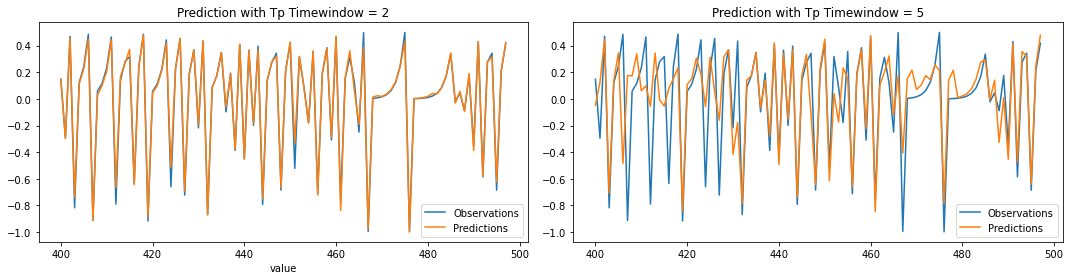

In [75]:
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.plot(simplex_out_2.Observations[400:498], label='Observations')
plt.plot(simplex_out_2.Predictions[400:498], label='Predictions')
plt.xlabel("value")
plt.legend()
plt.title("Prediction with Tp Timewindow = 2")


plt.subplot(122)
plt.plot(simplex_out_5.Observations[400:498], label="Observations")
plt.plot(simplex_out_5.Predictions[400:498], label="Predictions")
plt.legend()
plt.title("Prediction with Tp Timewindow = 5")


plt.tight_layout()

## Differentiating Noisy Signals from Chaotic Signals using Simplex Projection

Despite having highly diverse properties, timeseries can occasionally appear similar. Using the plots below, we will use Simplex Projection to distinguish between a noisy signal and chaotic signals.

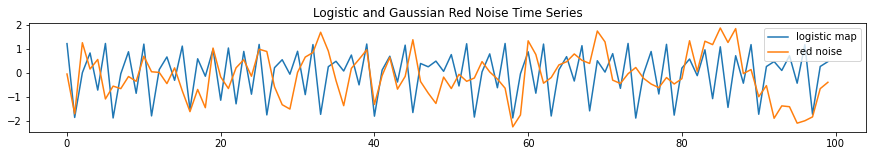

In [7]:
# Read Data and Normalize / Plot
import pandas as pd
smap_df = pd.read_csv(filepath_or_buffer='ESM2_Data_noise.csv')
smap_df['R'] = (smap_df['R'] - np.mean(smap_df['R']))/np.std(smap_df['R'])
smap_df['L'] = (smap_df['L'] - np.mean(smap_df['L']))/np.std(smap_df['L'])
smap_df['T'] = pd.Series(np.arange(1,10001))
smap_df = smap_df[['T', 'R', 'L']]

plt.figure(figsize=(15, 2))

# pd.Series(smap_df['R'][0:100]).plot(color='r', label='red noise')
# pd.Series(smap_df['L'][0:100]).plot(color='b', label='logistic map')

pd.Series(smap_df['L'][0:100]).plot(label='logistic map')
pd.Series(smap_df['R'][0:100]).plot(label='red noise')
plt.title('Logistic and Gaussian Red Noise Time Series')

plt.legend(loc='best')

In [46]:
corr_coeff_sinemap = []
corr_coeff_tentmap = []
for Tp in np.arange(11):
    simplex_out = Simplex( dataFrame = noisysine_df, lib = "1 150", pred = "501 999",  E = 3, Tp=Tp, embedded = False, showPlot = False, columns="Data", target="Data")
    metrics = pyEDM.ComputeError(simplex_out.Observations, simplex_out.Predictions)
    corr_coeff_sinemap.append(metrics['rho'])
    
    simplex_tent = Simplex( dataFrame = tentMap2_df, lib = "1 150", pred = "501 999",  E = 3, Tp=Tp, embedded = False, showPlot = False, columns="Data", target="Data")
    metrics = pyEDM.ComputeError(simplex_tent.Observations, simplex_tent.Predictions)
    corr_coeff_tentmap.append(metrics['rho'])
    

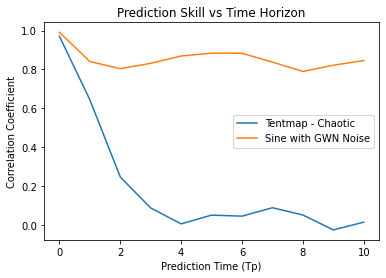

In [14]:
# corr_coeff_sinemap = [0.83, 0.81, 0.8, 0.83, 0.87, 0.86, 0.83, 0.78, 0.8, 0.83]
# corr_coeff_tentmap = [1.0, 1.0, 0.98, .88, 0.61, 0.35, 0.19, 0.08, 0.06, 0.02]
pd.Series(corr_coeff_tentmap).plot(label="Tentmap - Chaotic")
pd.Series(corr_coeff_sinemap).plot(label= "Sine with GWN Noise")
plt.ylabel('Correlation Coefficient')
plt.xlabel('Prediction Time (Tp)')
plt.title("Prediction Skill vs Time Horizon")
plt.legend(loc='best')
plt.show()


**Discussion**

As we can see above, the TentMap exhibits the typical decline in predictive power while the SineMap distorted by noise showed no degradation in the correlation coefficient as prediction time increased. This demonstrates how Simplex Projection can distinguish between signals that are merely noisy and ones that exhibit chaotic signal characteristics.

## Determining Optimal Embedding Value (E) via Simplex Iteration (Hyper Parameter Tuning)

In [8]:
# let's define a number of possible embeddings/projections/dimensions
embeds = np.arange(2,11)
data = tentmap_df

# output metrics for each embedding value
MAE = [] # Mean Absolute Error
rho = [] # Pearson correlation
RMSE = [] # Root-Mean Square Error

for e in embeds:
  simplex_result = pyEDM.Simplex(dataFrame=data, E=e, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap')
  metrics = pyEDM.ComputeError(simplex_result.Observations, simplex_result.Predictions)
  MAE.append(metrics['MAE'])
  rho.append(metrics['rho'])
  RMSE.append(metrics['RMSE'])


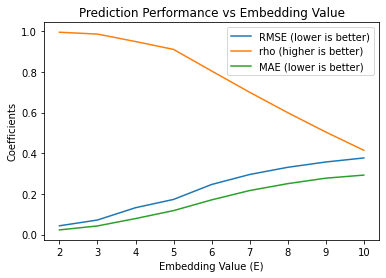

In [49]:
pd.Series(RMSE).plot(label='RMSE (lower is better)') 
pd.Series(rho).plot(label='rho (higher is better)') 
pd.Series(MAE).plot(label='MAE (lower is better)') 

x = np.arange(9)
plt.xticks(x, embeds)
plt.xlabel('Embedding Value (E)')
plt.ylabel('Coefficients')
plt.legend(loc='best')
plt.title("Prediction Performance vs Embedding Value")
plt.show()



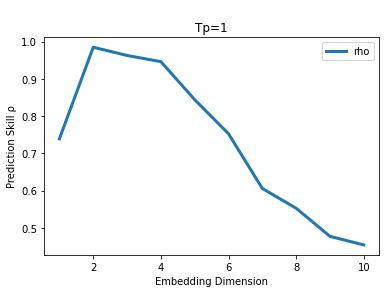

      E       rho
0   1.0  0.738879
1   2.0  0.984968
2   3.0  0.962877
3   4.0  0.946269
4   5.0  0.844142
5   6.0  0.752485
6   7.0  0.605438
7   8.0  0.552297
8   9.0  0.476710
9  10.0  0.453770


In [113]:
optimal_emdedding = pyEDM.EmbedDimension(dataFrame=tentmap_df, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap')
print(optimal_emdedding)

# Optimal embedding value E = 2 for Time Horizon, Tp = 1

In the figure below, using Optimal Embedding E=2, we can display the decreasing prediction power, as expected, given that the time series is intrinsically chaotic. Based on the plot above, we can determine that the Optimal Embedding Value to be utilized for the State-Space Reconstruction is E=2.

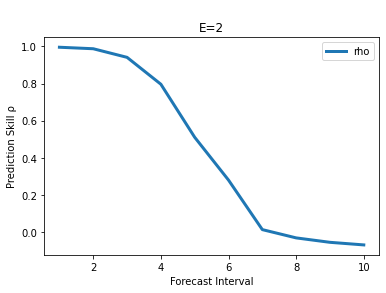

In [50]:
data = tentmap_df
rho_Tp = pyEDM.PredictInterval(dataFrame=data, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap', E = 2)

### Comparison with Uncorrelated Noise Data

We have seen in the charts above how effective the Simplex Method is for dynamic time-series. This observation can really help us determine if a time series is chaotic or simply tainted by noise.

In [51]:
# Generate a Guassian White Noise Signal

noise_map = pd.Series(np.random.normal(size=1000), name='GWN').to_frame()
time_map = pd.Series(np.arange(1,1000), name='Time').to_frame()
noisy_data = pd.concat([time_map, noise_map], axis= 1)

In [52]:
# let's define a number of possible embeddings/projections/dimensions
embeds = np.arange(2,11)
data = noisy_data

# output metrics for each embedding value
MAE = [] # Mean Absolute Error
rho = [] # Pearson correlation
RMSE = [] # Root-Mean Square Error

for e in embeds:
  simplex_result = pyEDM.Simplex(dataFrame=data, E=e, lib="1 100" , pred="201 500" , columns='GWN', target='GWN')
  metrics = pyEDM.ComputeError(simplex_result.Observations, simplex_result.Predictions)
  MAE.append(metrics['MAE'])
  rho.append(metrics['rho'])
  RMSE.append(metrics['RMSE'])


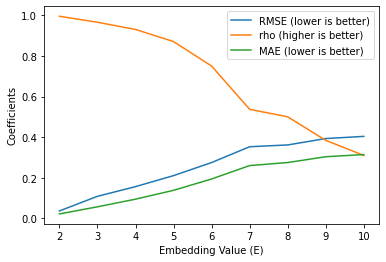

In [39]:
pd.Series(RMSE).plot(label='RMSE (lower is better)') 
pd.Series(rho).plot(label='rho (higher is better)') 
pd.Series(MAE).plot(label='MAE (lower is better)') 

x = np.arange(9)
plt.xticks(x, embeds)
plt.xlabel('Embedding Value (E)')
plt.ylabel('Coefficients')
plt.legend(loc='best')
plt.show()

### Discussion

We can get the conclusion that this particular time series is not necessarily chaotic and might simply be a noise-corrupted signal from the RMSE, rho, and MAE plots because there is no appreciable change in the error and correlation coefficients.

When considering the values of **rho**, we can then compute for an Optimal Embedding value, however for realistic values of E, prediction skill is already minimal to begin with.


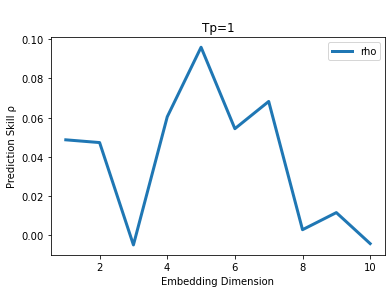

      E       rho
0   1.0  0.048732
1   2.0  0.047331
2   3.0 -0.004849
3   4.0  0.060468
4   5.0  0.095930
5   6.0  0.054404
6   7.0  0.068297
7   8.0  0.002909
8   9.0  0.011628
9  10.0 -0.004182


In [53]:
optimal_emdedding = pyEDM.EmbedDimension(dataFrame=data, lib="1 100" , pred="201 500" , columns='GWN', target='GWN')
print(optimal_emdedding)

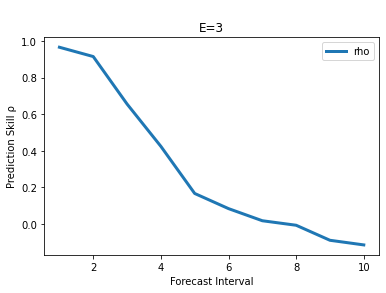

In [43]:
data = tentmap_df
rho_Tp = pyEDM.PredictInterval(dataFrame=data, lib="1 100" , pred="201 500" , columns='TentMap', target='TentMap', E = 3)

## S-MAP (Sequentially Locally Weighted Global Linear Map)

- difference from Simplex is the factor theta 
- the position of the nearby points in the state-space would have different weights (e.g., the closer the points, the higher the weights)
- used also to determine non-linear dynamical systems from linear stochastic systems
- after creating the set if time-delayed vectors (similar to the Simplex Method), the predictions are generated given a locally weighted auto-regressive model of the embedded time-series
 


$$ w(d) = exp(- \theta d / \bar{d}) $$ 

where $\theta \geq 0$

$d$ = Euclidean distance between predictee and neighbors in the embedded space

$\bar{d}$ = average distance between the predictee and all other vectors  

the parameter $\theta$ controls the degree of state dependency. 

If $\theta= 0$, all library points have the same weight
regardless of the local state of the predictee; mathematically, this model reduces to linear autoregressive
model. 

In contrast, if $\theta > 0$, the forecast given by the
S-map depends on the local state of the predictee, and
thus produces locally different fittings. Therefore, by
comparing the performance of equivalent linear
(h = 0) and nonlinear (h > 0) S-map models, one can
distinguish nonlinear dynamical systems from linear
stochastic systems.

<img src="smap.jpg" style="width:500px">

### Compare S-Map Performance of a Logistic Map (Chaotic) and Gaussian Red Noise

The following procedures attempt to differentiate between Gaussian Red Noise and Chaotic Signals, which may visually resemble one another.

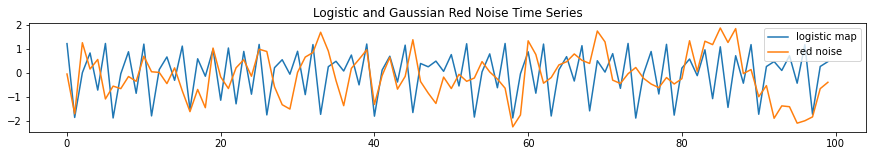

In [9]:
# Read Data and Normalize / Plot
smap_df = pd.read_csv(filepath_or_buffer='ESM2_Data_noise.csv')
smap_df['R'] = (smap_df['R'] - np.mean(smap_df['R']))/np.std(smap_df['R'])
smap_df['L'] = (smap_df['L'] - np.mean(smap_df['L']))/np.std(smap_df['L'])
smap_df['T'] = pd.Series(np.arange(1,10001))
smap_df = smap_df[['T', 'R', 'L']]

plt.figure(figsize=(15, 2))

# pd.Series(smap_df['R'][0:100]).plot(color='r', label='red noise')
# pd.Series(smap_df['L'][0:100]).plot(color='b', label='logistic map')

pd.Series(smap_df['L'][0:100]).plot(label='logistic map')
pd.Series(smap_df['R'][0:100]).plot(label='red noise')
plt.title('Logistic and Gaussian Red Noise Time Series')

plt.legend(loc='best')

### Hyperparameter Tuning for Gaussian Red Noise

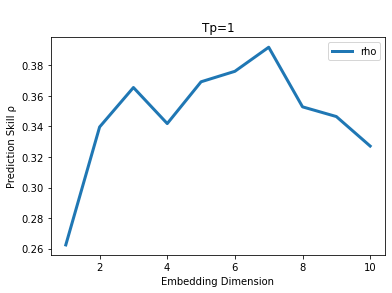

In [80]:
# Determining Optimal Embedding Dimension for Gaussian Red Noise
data = smap_df
optimal_emdedding_red_noise = pyEDM.EmbedDimension(dataFrame=data, lib="1 500" , pred="501 1000" , columns='R', target='R')

# Optimal Embedding Dimension for Gaussian Red Noise, E = 7

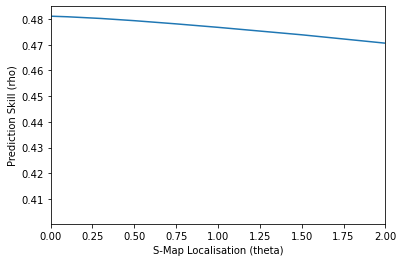

In [26]:
# Gaussian Red Noise
# Use Optimal Embedding from above, E = 7
# Analyze Prediction Skill
preds = pyEDM.PredictNonlinear(dataFrame=smap_df, E=7, lib="1 500" , pred="501 1000" , columns='R', target='R', showPlot=False)
plt.plot(preds['Theta'], preds['rho'])
plt.xlim(0, 2)
plt.ylabel('Prediction Skill (rho)')
plt.xlabel('S-Map Localisation (theta)')
plt.show()

### Discussion

 Since Gaussian Red Noise isn't inherently chaotic, the approaches' predictive abilities would be lower. Although the time series might appear chaotic on the surface in the example above, there is just a little less than a 0.5 correlation.

### Hyperparameter Tuning for Logistic Map

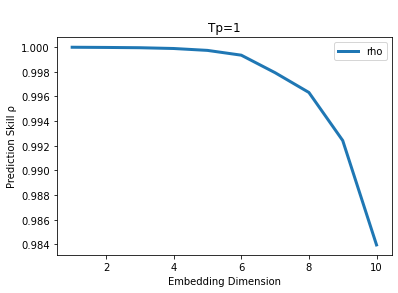

In [81]:
# Determining Optimal Embedding Dimension for the Logistic Map
data = smap_df
optimal_emdedding_log_map = pyEDM.EmbedDimension(dataFrame=data, lib="1 500" , pred="501 1000" , columns='L', target='L')

# Optimal Embedding Dimension for Logistic Map, E = 2

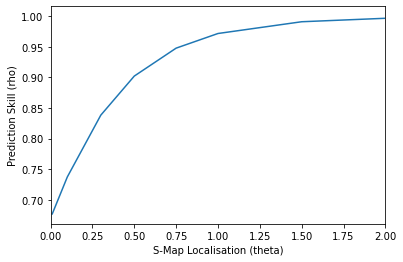

In [28]:
# Logistic Map
# Use Optimal Embedding from above, E = 2
# Analyze Prediction Skill
preds = pyEDM.PredictNonlinear(dataFrame=smap_df, E=2, lib="1 500" , pred="501 1000" , columns='L', target='L', showPlot=False)
plt.xlim([0, 2])
plt.plot(preds['Theta'], preds['rho'])
plt.ylabel('Prediction Skill (rho)')
plt.xlabel('S-Map Localisation (theta)')
plt.show()

## Forecasting Univariate, Multivariate, Multi-views

In the framework of EDM, 3 different methods have been proposed so far:


1.   Univariate Embedding (Takens 1981, Sugihara and May 1990)
2.   Multivariate Embedding (Dixon et. al, 1999, Sugihara and Deyle (2011)
1.   Multi-viw Embedding (Sugihara and Ye, 2016)








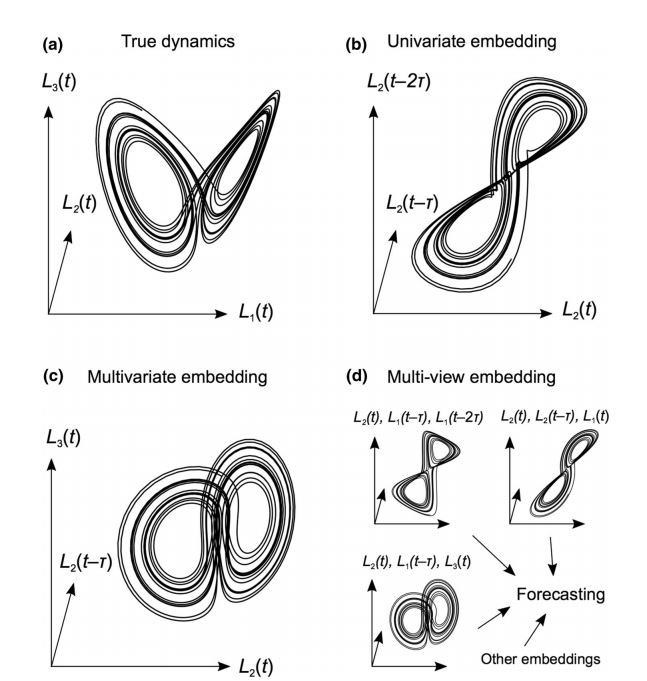

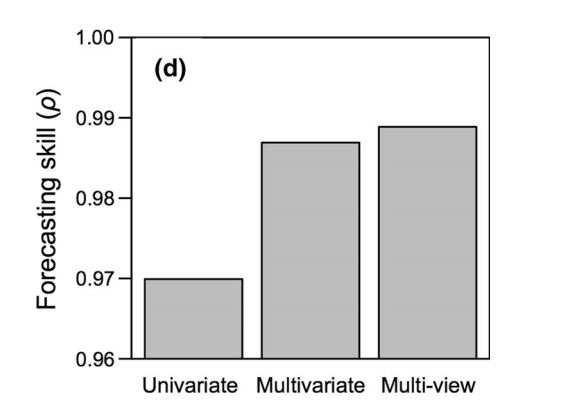

## Univariate, Multivariate and Multiview Forecasting of a Resource-Consumer-Predator Model

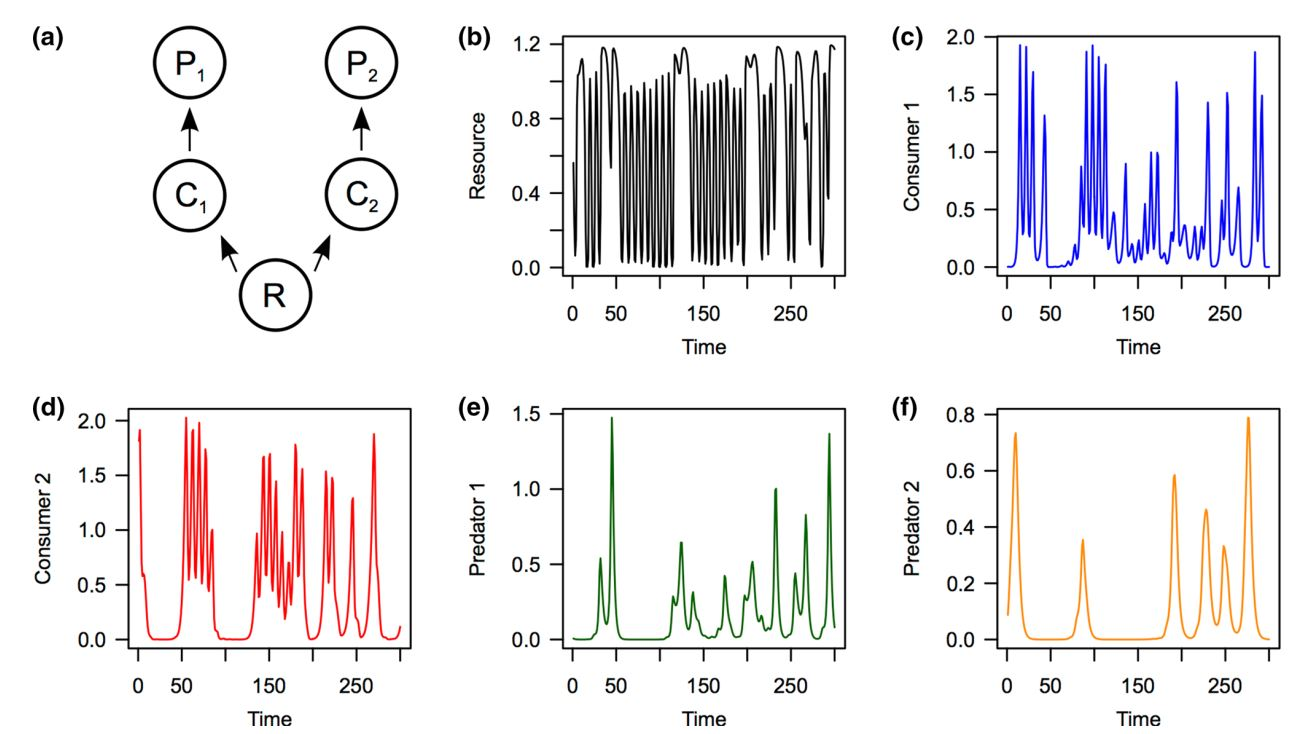

### Example: Do Prediction on C1 using different methods 


Exercises from [CW Chang 2017] [6]

### Univariate


*   use univariate embedding
*   to reconstruct the state space using only information
(history) encoded in C1. 

Using optimal embedding dimension E= 3 (precomputed)

*   state space is reconstructed using ${C1(t),C1(t - 1), C1(t - 2)}$. 
*   The forecasting skill is 0.970 



In [10]:
uni_df = pd.read_csv(filepath_or_buffer='5 specie data set.csv', index_col=False)
uni_df['Time'] = pd.Series(np.arange(2001))
uni_df = uni_df[['Time','R', 'C1', 'C2','P1', 'P2']]
uni_df.head()

,Time,R,C1,C2,P1,P2
0,0,0.562018,0.002226,1.815200,0.006884,0.087266
1,1,0.238250,0.002987,1.913687,0.004210,0.137499
2,2,0.063778,0.002384,1.275531,0.002576,0.210435
3,3,0.153577,0.001665,0.692132,0.001572,0.286715
4,4,0.860214,0.002310,0.578684,0.000959,0.352087


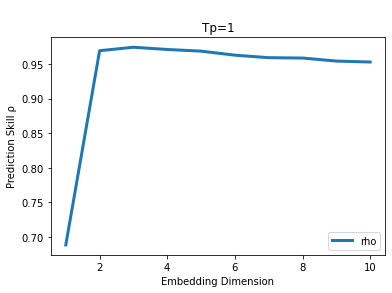

      E       rho
0   1.0  0.688288
1   2.0  0.969399
2   3.0  0.974422
3   4.0  0.971195
4   5.0  0.968775
5   6.0  0.962940
6   7.0  0.959300
7   8.0  0.958808
8   9.0  0.954404
9  10.0  0.953030


In [84]:
optimal_emdedding = pyEDM.EmbedDimension(dataFrame=uni_df, lib="1 1000" , pred="1001 1999" , columns='C1', target='C1')
print(optimal_emdedding)

From the data above, optimal Embedding E = 3 with highest correlation coefficient (forecasting skill) rho = 0.974439

In [86]:
simplex_out_uni = Simplex( dataFrame =uni_df, lib = "1 1000", pred = "1001 1999",  E = 3, Tp=1, embedded = False, showPlot = False, columns="C1", target="C1")

In [87]:
simplex_out_uni.head(5)

,Time,Observations,Predictions,Pred_Variance
0,1000,0.226670,NaN,NaN
1,1001,0.433118,0.415078,0.002822
2,1002,0.843978,0.728465,0.010937
3,1003,1.465515,1.402749,0.052009
4,1004,1.413874,1.747335,0.008604


Text(0.5, 1.0, 'Prediction with Embedding E = 3')

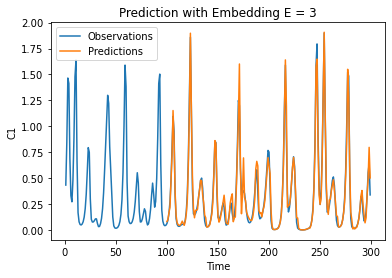

In [88]:
# Plot of Predictions vs Observations

plt.plot(simplex_out_uni.Observations[1:300], label='Observations')
plt.plot(simplex_out_uni.Predictions[100:300], label='Predictions')
plt.xlabel("Time")
plt.ylabel("C1")
plt.legend()
plt.title("Prediction with Embedding E = 3")

### Multivariate



*   information in R and P1 is useful for forecasting the population dynamics of C1
*   use ${R(t), P1(t), C1(t)}$ (i.e., native multivariate embedding w/o
using lagged values)
*   The forecasting skill is 0.987
*   Since for C1, optimal embedding dimension is 3,  ${R(t), P1(t), C1(t)}$ is
sufficient
*   if, for example, computed optimal embessing is 4, use ${C1(t-1)}$

In [89]:
multivariate_out = Simplex( dataFrame =uni_df, lib = "1 200", pred = "500 700", E = 3, Tp=1, embedded = False, showPlot = False, columns="R P1 C1", target="C1")

In [90]:
multivariate_out.head(5)

,Time,Observations,Predictions,Pred_Variance
0,499,0.879706,NaN,NaN
1,500,0.981080,1.157826,0.031553
2,501,0.694387,1.009867,0.114386
3,502,0.150185,0.228026,0.021878
4,503,0.013382,0.049704,0.003086


Text(0.5, 1.0, 'Prediction with Embedding E = 3')

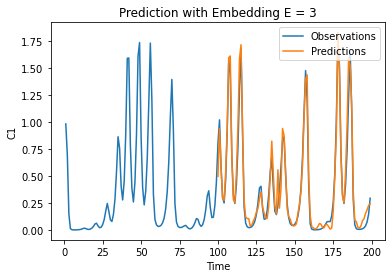

In [91]:
plt.plot(multivariate_out.Observations[1:200], label='Observations')
plt.plot(multivariate_out.Predictions[100:200], label='Predictions')
plt.xlabel("Time")
plt.ylabel("C1")
plt.legend()
plt.title("Prediction with Embedding E = 3")

### Multi-view


*   a recent technique developed only last 2016 (Sugihara and Ye)
*   makes use of different variables with different time-lags
*   given $l$ lags and $n$ variables, the number of E-dimensional variables combinations is: (given a prior computed Embedding E)

$m$ = $\mathbf{nl \choose E} $ - $\mathbf{n(l-1) \choose E }$



*   choose the top-k reconstructions, ranked by forecasting skill
*   top k = $\sqrt(m)$
*   forecasting skill on the R-C-P Model: 0.987

In [11]:
multiview_out = pyEDM.Multiview(dataFrame =uni_df, lib = "1 200", pred = "500 700",  E = 3, Tp=1, showPlot = False, columns="R C1 C2 P1 P2", target="C1")

Text(0.5, 1.0, 'Prediction with Embedding E = 3')

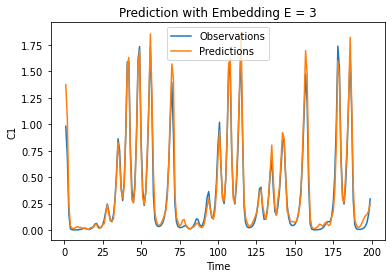

In [12]:
plt.plot(multiview_out['Predictions'].Observations[1:200], label='Observations')
plt.plot(multiview_out['Predictions'].Predictions[1:200], label='Predictions')
plt.xlabel("Time")
plt.ylabel("C1")
plt.legend()
plt.title("Prediction with Embedding E = 3")

### For the Lorenz Attractor


*   there are three state-variables $L1, L2, L3$
*   given 3-variables, and 2 lag-times (lag-times are arbitrarily set)

$m$ = $\mathbf{(3 x 2) \choose 3} $ - $\mathbf{3 x (2-1) \choose 3 }$

$m = 19$



*   top k = $\sqrt(19)$, ~ top-4 or top-5 views based on forecasting skill


<img src="lorenz.jpeg" style="width:500px">






## In the next section...

We'll use empirical dynamic modeling techniques in various contexts, particularly when determining if each shadow manifold can be characterized as a source of causation for other time series. We will expand on the ideas we have discussed in the notebook (such as simple projections, etc.) to find potential causal relationships between various variables in a complicated dynamical system while only considering empirical data.

## Application to the Jenna Climate Dataset

We will now try to apply the Simplex Projection and SMap Projection to the Power Consumption Dataset for 1 variable prediction

In [194]:
# Import Libraries
import numpy as np
from numpy.random import default_rng
import pandas as pd
from pandas.plotting import autocorrelation_plot
import scipy.stats as st
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_absolute_error
from tqdm import tqdm
from pyEDM import *
%matplotlib inline
rng = default_rng()


In [195]:
# read training data and test data
train_df = pd.read_csv(filepath_or_buffer='train_set.csv')
test_df = pd.read_csv(filepath_or_buffer='test_set.csv')
val_df = pd.read_csv(filepath_or_buffer='val_set.csv')



C:\Users\Michael Baylon\AppData\Local\Temp\ipykernel_18320\3968523482.py:3: DtypeWarning: Columns (1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_df = pd.read_csv(filepath_or_buffer='test_set.csv')


In [196]:
# Print sizes
print("Training Set Size: {}".format(train_df.shape))
print("Validation Set Size: {}".format(val_df.shape))
print("Test Set Size: {}".format(test_df.shape))


Training Set Size: (349525, 8)
Validation Set Size: (349525, 8)
Test Set Size: (349525, 8)


In [197]:
## Concatenate the Dataframes into one

power_df = pd.concat([train_df, val_df, test_df])

Since we will be limiting the application to Univariate (Power) Prediction, we will drop all other columns.
As a requirement of the pyEDM library, we need to rename the first column into "Time"

In [198]:
# Drop other columns
power_df = power_df.drop(power_df.columns[3:], axis=1)
power_df = power_df.drop(power_df.columns[2], axis=1)

# Rename first column to "Time", the Power into a friendly string
power_df = power_df.rename(columns = {'Global_active_power': 'Power'})
power_df = power_df.rename(columns = {'Unnamed: 0': 'dt'})
power_df.reset_index(drop=True)


,dt,Power
0,1,4.216
1,2,5.36
2,3,5.374
3,4,5.388
4,5,3.666
...,...,...
1048570,349521,0.276
1048571,349522,0.274
1048572,349523,0.274
1048573,349524,0.274


In [199]:
# plot the training set and testing set combined

data_size = train_df.shape[0] + val_df.shape[0]
pd.Series(power_df["Power"][0:data_size]).plot()
plt.ylabel('Power - Training Plus Validation', size=16)

TypeError: no numeric data to plot

In [191]:
# plot the test set

pd.Series(power_df["Power"][data_size:]).plot()
plt.ylabel('Power - Test', size=16)

TypeError: no numeric data to plot

In [192]:
# quick check for stationarity in the training set and testing set

from statsmodels.tsa.stattools import adfuller

result = adfuller(power_df["Power"][0:data_size])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
# quick test shows stationarity 

ValueError: could not convert string to float: '?'

### Hyperparameter Tuning (Calculation of Optimal Embedding)

In [193]:
# Calculate Optimal Embedding by looking at various time chunks

rho_values = pd.DataFrame(data=np.zeros((10,2)), columns = ['E', 'rho'])
# starting row of validation data 
start_pt = 35046 
num_blocks = 100


for i in tqdm(range(num_blocks)):
    starting = (24*i) + start_pt
    ending = starting + 24 - 1
    preds = str(starting) + " " + str(ending)
    starting = ending + 1

    current_rho = pyEDM.EmbedDimension(dataFrame=power_df, lib="1 35045" , pred=preds , columns='Power', target='Power', showPlot=False)
    rho_values.rho = rho_values.rho + current_rho.rho
    rho_values.E = current_rho.E

rho_values.rho = rho_values.rho / num_blocks
rho_values.plot('E', 'rho')


  0%|                                                                                          | 0/100 [00:00<?, ?it/s]

dt        int64
Power    object
dtype: object


RuntimeError: PandasDataFrametoDF() non-numeric data is not allowed in a DataFrame.

In [ ]:
# Calculate optimal embedding E using all values (not by chunks)
# time period is from 35046 to 52326

rho_whole = pyEDM.EmbedDimension(dataFrame=power_df, lib="1 35045" , pred="35046 52326" , columns='Power', target='Power', showPlot=False)
rho_whole.plot('E', 'rho')

### Computation of MAE using Simplex Projection Method

In [116]:
MAE = []
e = 6
start_pt = 52570
num_blocks = 100
for i in tqdm(range(num_blocks)):
    starting = (24*i) + start_pt
    ending = starting + 24 - 1
    preds = str(starting) + " " + str(ending)
    starting = ending + 1

    power_result = pyEDM.Simplex(dataFrame=power_df, lib="1 35045", pred=preds, Tp=24, columns="Power", target="Power", E = e, showPlot=False)
    mae_current = mean_absolute_error(power_result.Observations[:24].to_numpy(), power_result.Predictions[24:].to_numpy())
    MAE.append(mae_current)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:18<00:00,  5.52it/s]


In [57]:
np.mean(MAE)

1.2339145175433177

In [ ]:
# Forecast Interval / Prediction Decay
rho_Tp = pyEDM.PredictInterval(dataFrame=train_val_df, lib="1 35044" , pred="35046 35070" , columns='Power', target='Power', E = 6)


### Computation of MAE using the SMap Method

In [ ]:
MAE_smap = []
e = 6
start_pt = 52570
num_blocks = 100
for i in tqdm(range(num_blocks)):
    starting = (24*i) + start_pt
    ending = starting + 24 - 1
    preds = str(starting) + " " + str(ending)
    starting = ending + 1

    power_result = pyEDM.SMap(dataFrame=power_df, lib="1 35045", pred=preds, Tp=24, columns="Power", target="Power", E = e, theta = 0.03, showPlot=False)
#     print(power_result['predictions'].Observations)
    mae_current = mean_absolute_error(power_result['predictions'].Observations[:24].to_numpy(), power_result['predictions'].Predictions[24:].to_numpy())
    MAE_smap.append(mae_current)

In [ ]:
np.mean(MAE_smap)

In [ ]:
# Predict Nonlinearity

rho_Theta = pyEDM.PredictNonlinear(dataFrame=train_val_df, lib="1 35045" , pred="35046 35070" , columns='Power', target='Power', showPlot=False)
rho_Theta.plot('Theta', 'rho')


## NOTE: 
The results that were more accurate than anticipated are still being looked into because it is not possible to say with absolute certainty that there has not been any data leaking. In order to operationalize the library to forecast values other than the historical data provided in the DataFrame, the functions are being examined and explored.



## Summary

- Non-parametric time-series analysis and forecasting techniques like Simplex and SMaps are particularly useful in dynamic systems where chaos may exist.
- Both approaches reconstruct a manifold in higher-dimensional space using lagged values and estimate the locations of points in the manifold using different iterations of nearest neighbor techniques.
- Due to the lack of parametric nature, the library must be recreated each time a prediction is to be made, adding to the computational complexity.



## In the next section...

We'll use empirical dynamic modeling techniques in various contexts, particularly when determining if each shadow manifold can be characterized as a source of causation for other time series. We will expand on the ideas we have discussed in the notebook (such as simple projections, etc.) to find potential causal relationships between various variables in a complicated dynamical system while only considering empirical data.

## References

The Contents of the Notebook is compiled from the following references:
1.   Sugihara Lab, 2020. "Empirical Dynamic Modelling", https://deepeco.ucsd.edu/nonlinear-dynamics-research/edm/ - visited 25 November, 2020
2.   Petchey, O. 2020 "Simplex Projection Walkthrough", http://opetchey.github.io/RREEBES/Sugihara_and_May_1990_Nature/Simplex_projection_walkthrough.html, DOI 10.5281/zenodo.57081, visited 25 November, 2020
1.   Sugihara, G. & May, R.M. (1990) Nonlinear forecasting as a way of distinguishing chaos from measurement error in time series. Nature, 344, 734–741.
2.   Perretti, C.T., Munch, S.B. & Sugihara, G. (2013) Model-free forecasting outperforms the correct mechanistic model for simulated and experimental data. Proceedings of the National Academy of Sciences (PNAS), 110, 5253–5257.)
1.   "Introduction to Empirical Modelling", Sugihara Lab,  link: https://www.youtube.com/watch?v=8DikuwwPWsY - visited 25 november 2020
2.   CW Chang, M Ushio, C Hsieh, 2017 "Empirical dynamic modeling for beginners", - Ecological Research
1.   Quanta Magazine, 2020. "A Twisted Path to Equation-Free Prediction", https://www.quantamagazine.org/chaos-theory-in-ecology-predicts-future-populations-20151013, visited 28 November 2020
2.   https://en.wikipedia.org/wiki/Lorenz_system, visited 30 November 2020
1.   "Introduction to Empirical Dynamic Modelling, Sugihara Lab, https://www.youtube.com/watch?v=fevurdpiRYg, visited 30 November 2020
1.   "Equation and parameter free dynamical modeling of natural time series", Fundamentals of Statistics and Computation for Neuroscientists Youtube Channel, https://www.youtube.com/watch?v=6yq0VAriUIQ
2. "ADS : Vol 4 : Chapter 4.1 : The Tent Map", Prof. Ghrist Math Youtube Channel, https://www.youtube.com/watch?v=TzEmZ1FXxNw&t=122s
1. Piziniacco. L, 2020. "Python, Complex Systems, Chaos and Lorenz Attractor", https://medium.com/@lucpiz/python-complex-systems-chaos-and-lorenz-attractor-28499de3f36a - visited February 2, 2021
2. "rEDM Tutorial.pdf - Applications of Empirical Dynamic Modelling in Time Series", SugiharaLab Github, https://github.com/SugiharaLab/rEDM/blob/master/vignettes/rEDM-tutorial.pdf, visited 25 November 2020 